In [14]:
import numpy as np
import plotly.express as px
from PIL import Image

# abrimos y reducimos el tamaño
img = Image.open('Jubilado_1.jpg')
img = img.resize((70,95), Image.LANCZOS)
img = img.convert('L') ### Pasamos a grises
fig = px.imshow(img)   ###
fig.show()
# todo en grises

In [ ]:
# define el tamaño de cada región a 8 filas
width, height = img.size[0], img.size[1] // 8

# Descomponemos la imagen
bins = []
for i in range(8):
    img_part = img.crop((0, i*height, width, (i+1)*height))
    imagen_mat = np.array(list(img_part.getdata(band=0)), int)
    bins.append(imagen_mat)
    #img_part.save(f'part_{i}.png')

In [ ]:
# verificamos el tamaño de barras para el histograma
len(bins)

8

In [ ]:
len(imagen_mat)

770

In [ ]:
#bins[0]

In [ ]:
x_bins = []
for bin in bins[2:-1]:
  x_bin = sum(bin)/len(bin)
  x_bins.append(x_bin)

In [ ]:
print(x_bins)

[167.85714285714286, 128.76753246753248, 168.25584415584416, 142.67532467532467, 137.63896103896104]


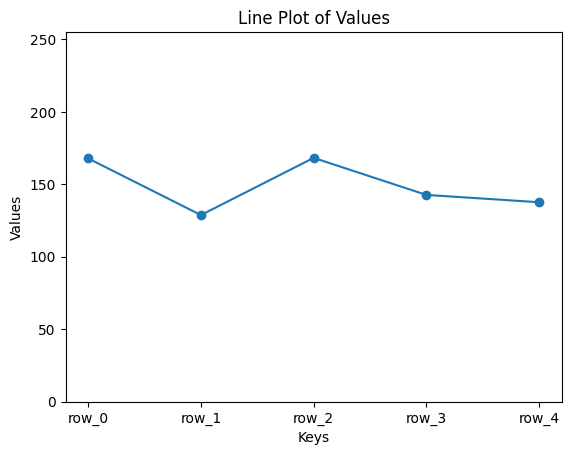

In [ ]:
# metemos a un dict para faciltiar la creacion de imagen
my_dict = {f'row_{i}': value for i, value in enumerate(x_bins)}

# dibujamos el plot-line
plt.plot(list(my_dict.keys()), list(my_dict.values()), marker='o')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Line Plot of Values')
plt.ylim(0, 255)
plt.show()

In [ ]:
square_size = min(95,70) // min(4, 4)

print("Size of each square:", square_size)


Size of each square: 17


In [30]:
import cv2
import numpy as np

def divide_into_tiles(image, num_rows, num_cols):
    height, width, _ = image.shape
    tiles_height = height // num_rows
    tiles_width = width // num_cols

    tiles = []

    for r in range(num_rows):
        for c in range(num_cols):
            x1 = c * tiles_width
            y1 = r * tiles_height
            x2 = x1 + tiles_width
            y2 = y1 + tiles_height

            tile = image[y1:y2, x1:x2]
            tiles.append(tile)

    return tiles

# Load your image
image = cv2.imread('Jubilado_1.jpg')
resized_img = cv2.resize(image, (70,95), interpolation= cv2.INTER_AREA)

# Specify the number of rows and columns for division
num_rows = 5
num_cols = 7

# Divide the image into tiles
tiles = divide_into_tiles(resized_img, num_rows, num_cols)

# Convert tiles to NumPy arrays
tiles_as_matrices = [np.array(tile) for tile in tiles]

# Display the dimensions of each tiles (optional)
for i, tile_matrix in enumerate(tiles_as_matrices):
    print(f'Tile {i} shape:', tile_matrix.shape)

Tile 0 shape: (19, 10, 3)
Tile 1 shape: (19, 10, 3)
Tile 2 shape: (19, 10, 3)
Tile 3 shape: (19, 10, 3)
Tile 4 shape: (19, 10, 3)
Tile 5 shape: (19, 10, 3)
Tile 6 shape: (19, 10, 3)
Tile 7 shape: (19, 10, 3)
Tile 8 shape: (19, 10, 3)
Tile 9 shape: (19, 10, 3)
Tile 10 shape: (19, 10, 3)
Tile 11 shape: (19, 10, 3)
Tile 12 shape: (19, 10, 3)
Tile 13 shape: (19, 10, 3)
Tile 14 shape: (19, 10, 3)
Tile 15 shape: (19, 10, 3)
Tile 16 shape: (19, 10, 3)
Tile 17 shape: (19, 10, 3)
Tile 18 shape: (19, 10, 3)
Tile 19 shape: (19, 10, 3)
Tile 20 shape: (19, 10, 3)
Tile 21 shape: (19, 10, 3)
Tile 22 shape: (19, 10, 3)
Tile 23 shape: (19, 10, 3)
Tile 24 shape: (19, 10, 3)
Tile 25 shape: (19, 10, 3)
Tile 26 shape: (19, 10, 3)
Tile 27 shape: (19, 10, 3)
Tile 28 shape: (19, 10, 3)
Tile 29 shape: (19, 10, 3)
Tile 30 shape: (19, 10, 3)
Tile 31 shape: (19, 10, 3)
Tile 32 shape: (19, 10, 3)
Tile 33 shape: (19, 10, 3)
Tile 34 shape: (19, 10, 3)


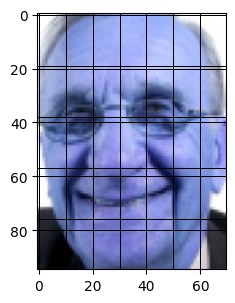

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

plt.figure(figsize=(6,3.2))
plt.subplots_adjust(top=0.9, bottom=0.1)

plt.imshow(resized_img,'gray',vmin=-1,vmax=1)

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(19))
plt.grid(which="both", linewidth=0.72,color="k")
plt.tick_params(which="minor", length=0)

plt.show()

In [ ]:
len(tiles_as_matrices[0])

41

In [ ]:
division = tiles_as_matrices[12]
division

array([[[191, 207, 254],
        [192, 206, 254],
        [188, 202, 250],
        [186, 197, 249],
        [184, 195, 247],
        [189, 200, 252],
        [196, 207, 255],
        [191, 205, 254],
        [188, 202, 251],
        [185, 199, 252],
        [183, 195, 253],
        [183, 194, 255],
        [176, 188, 252],
        [172, 187, 249],
        [175, 193, 254],
        [174, 192, 253],
        [172, 190, 251],
        [166, 184, 245],
        [166, 184, 245],
        [174, 191, 254],
        [173, 190, 253],
        [171, 187, 253],
        [169, 185, 251]],

       [[191, 208, 251],
        [195, 211, 254],
        [193, 209, 252],
        [189, 203, 251],
        [186, 199, 251],
        [183, 195, 249],
        [186, 197, 254],
        [186, 198, 252],
        [185, 197, 251],
        [183, 197, 250],
        [183, 195, 253],
        [182, 195, 255],
        [176, 188, 252],
        [171, 186, 248],
        [173, 191, 252],
        [175, 193, 254],
        [173, 191, 252],
        [166, 183, 246],
        [163, 180, 243],
        [168, 185, 248],
        [168, 185, 248],
        [171, 188, 251],
        [169, 186, 249]],

       [[187, 203, 249],
        [190, 206, 249],
        [192, 208, 251],
        [190, 204, 252],
        [186, 199, 251],
        [184, 195, 252],
        [182, 193, 250],
        [179, 190, 247],
        [181, 194, 250],
        [181, 194, 250],
        [184, 196, 254],
        [184, 197, 255],
        [174, 189, 251],
        [176, 191, 253],
        [173, 191, 252],
        [174, 192, 253],
        [174, 192, 253],
        [170, 187, 250],
        [167, 184, 247],
        [166, 183, 246],
        [163, 180, 243],
        [167, 184, 247],
        [164, 181, 244]],

       [[188, 205, 254],
        [190, 206, 253],
        [189, 205, 251],
        [189, 204, 253],
        [190, 204, 255],
        [190, 204, 255],
        [186, 199, 255],
        [182, 194, 252],
        [181, 193, 251],
        [178, 190, 248],
        [176, 190, 249],
        [180, 194, 253],
        [174, 189, 251],
        [179, 194, 255],
        [173, 190, 253],
        [173, 190, 253],
        [173, 190, 253],
        [172, 188, 254],
        [173, 189, 255],
        [173, 190, 253],
        [171, 188, 251],
        [167, 184, 247],
        [164, 181, 244]],

       [[187, 202, 255],
        [195, 209, 255],
        [192, 206, 255],
        [189, 203, 255],
        [190, 204, 255],
        [189, 203, 255],
        [188, 201, 255],
        [185, 197, 255],
        [182, 193, 253],
        [174, 188, 247],
        [170, 184, 243],
        [177, 190, 252],
        [179, 194, 255],
        [177, 194, 255],
        [173, 190, 253],
        [173, 190, 253],
        [168, 185, 248],
        [167, 183, 249],
        [173, 189, 255],
        [178, 195, 255],
        [181, 198, 255],
        [171, 188, 251],
        [167, 184, 247]],

       [[172, 187, 250],
        [181, 194, 255],
        [183, 197, 255],
        [184, 197, 253],
        [184, 198, 250],
        [184, 198, 250],
        [187, 201, 253],
        [182, 197, 253],
        [180, 194, 252],
        [175, 188, 250],
        [170, 183, 245],
        [174, 189, 252],
        [182, 197, 255],
        [177, 194, 255],
        [172, 190, 253],
        [171, 189, 254],
        [163, 181, 246],
        [160, 176, 242],
        [169, 185, 251],
        [177, 193, 255],
        [183, 200, 255],
        [169, 186, 249],
        [166, 184, 245]],

       [[165, 180, 243],
        [164, 176, 240],
        [171, 184, 246],
        [182, 194, 252],
        [186, 200, 253],
        [187, 201, 253],
        [189, 203, 255],
        [182, 197, 253],
        [181, 195, 253],
        [179, 192, 254],
        [173, 185, 249],
        [173, 188, 251],
        [179, 194, 255],
        [177, 194, 255],
        [172, 190, 253],
        [171, 189, 254],
        [161, 179, 244],
        [159, 175, 241],
        [170, 186, 252],
        [176, 192, 255],
        [181, 197, 255],
        [170,

In [ ]:
listo = list(range(7,12))
len(listo)
listo

[7, 8, 9, 10, 11]

In [ ]:
ojos_tiles_medias_top = []
ojos_tiles_medias_bottom = []

for i, z in zip(range(7,12), range(14,19)):
  flattenMatrix = tiles_as_matrices[i].flatten()
  flattenMatrix_2 = tiles_as_matrices[z].flatten()
  flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
  flattenMatrix_2 = sum(flattenMatrix_2) / len(flattenMatrix_2)
  ojos_tiles_medias_top.append(flattenMatrix)
  ojos_tiles_medias_bottom.append(flattenMatrix_2)

ojos_sum_media_list = []

for i,z in zip(ojos_tiles_medias_top,ojos_tiles_medias_bottom):
  tile_sum_media = (i + z) /2
  ojos_sum_media_list.append(tile_sum_media)

In [ ]:
boca_tiles_medias = []

for i in range(22,26):
  flattenMatrix = tiles_as_matrices[i].flatten()
  flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
  boca_tiles_medias.append(flattenMatrix)

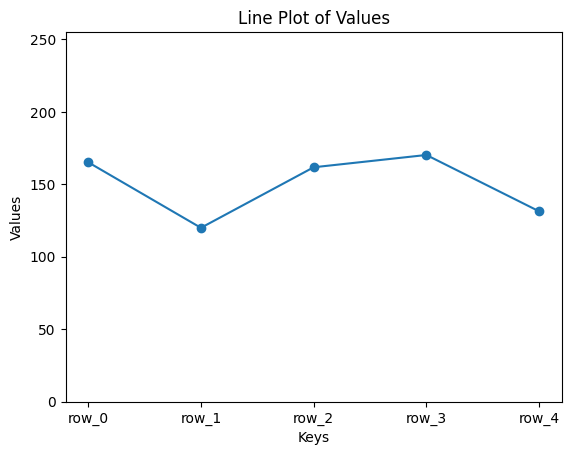

In [ ]:
# metemos a un dict para faciltiar la creacion de imagen
my_dict = {f'row_{i}': value for i, value in enumerate(ojos_sum_media_list)}

# dibujamos el plot-line
plt.plot(list(my_dict.keys()), list(my_dict.values()), marker='o')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Line Plot of Values')
plt.ylim(0, 255)
plt.show()

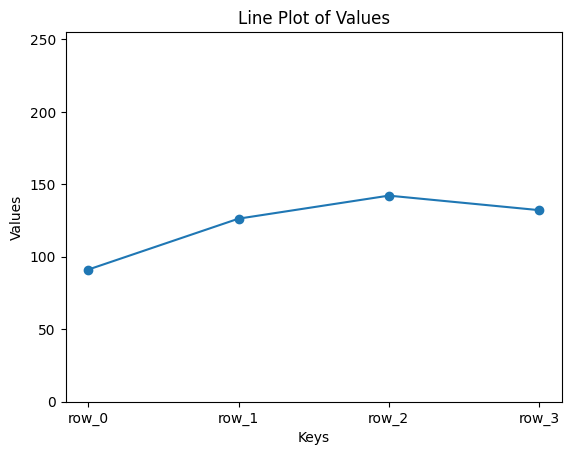

In [ ]:
# metemos a un dict para faciltiar la creacion de imagen
my_dict = {f'row_{i}': value for i, value in enumerate(boca_tiles_medias)}

# dibujamos el plot-line
plt.plot(list(my_dict.keys()), list(my_dict.values()), marker='o')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Line Plot of Values')
plt.ylim(0, 255)
plt.show()

In [19]:
import numpy as np
import plotly.express as px
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.ticker
import os

folder_path = 'images/'

# List all files in the folder
image_files = os.listdir(folder_path)

for file_name in image_files:
    # Check if the file is an image file (optional)
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.JPG'):
        # Load the image
        image_path = os.path.join(folder_path, file_name)
        #image = cv2.imread(image_path)
         # abrimos y reducimos el tamaño
        img = Image.open(image_path)
        img = img.resize((70,95), Image.LANCZOS)
        img = img.convert('L')

        fig = px.imshow(img)
        fig.show()
    else:
      print("no sirve tu imagen")
      break

    # define el tamaño de cada región a 8 filas
    width, height = img.size[0], img.size[1] // 8

    # Descomponemos la imagen
    bins = []

no sirve tu imagen


In [15]:

def divide_into_tiles(image, num_rows, num_cols):
    height, width, _ = image.shape
    tiles_height = height // num_rows
    tiles_width = width // num_cols

    tiles = []

    for r in range(num_rows):
        for c in range(num_cols):
            x1 = c * tiles_width
            y1 = r * tiles_height
            x2 = x1 + tiles_width
            y2 = y1 + tiles_height

            tile = image[y1:y2, x1:x2]
            tiles.append(tile)

    return tiles


In [40]:
len(x_bins)

5

In [81]:
import numpy as np
import plotly.express as px
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.ticker
import os
import csv

folder_path = 'images/'

# List all files in the folder
image_files = os.listdir(folder_path)

for file_name in image_files:
    # Check if the file is an image file (optional)
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.JPG'):
      image_path = os.path.join(folder_path, file_name)
      img = Image.open(image_path)
      img = img.resize((70,95), Image.LANCZOS)
      img = img.convert('L')
      ## los horizontales:
      image = cv2.imread(image_path)
      resized_img = cv2.resize(image, (70,95), interpolation= cv2.INTER_AREA)

    # define el tamaño de cada región a 8 filas
    width, height = img.size[0], img.size[1] // 8

    # Descomponemos la imagen
    bins = []

    for i in range(8):
      img_part = img.crop((0, i*height, width, (i+1)*height))
      imagen_mat = np.array(list(img_part.getdata(band=0)), int)
      bins.append(imagen_mat)

    x_bins = []
    for bin in bins[2:-1]:
      x_bin = sum(bin)/len(bin)
      x_bins.append(x_bin)
    print(x_bins)
    print(file_name)

    with open('histograms_vertical.csv', 'a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(x_bins)
    # with open('histograms_vertical.csv', 'w', newline='') as file:
    #   pass

    # with open('histograms_vertical.csv', 'a', newline='') as file:
    #   writer = csv.writer(file)
    #   writer.writerow(x_bins)


    # Dividimos en "placas" definir las rows y cols para ello.
    num_rows = 5
    num_cols = 7

    # Dividimos en placas
    tiles = divide_into_tiles(resized_img, num_rows, num_cols)

    # Convertimos a un numpy array
    tiles_as_matrices = [np.array(tile) for tile in tiles]

    # Podemos observar la cantidad de placas y su forma
    # for i, tile_matrix in enumerate(tiles_as_matrices):
    #     print(f'Tile {i} shape:', tile_matrix.shape)

    ojos_tiles_medias_top = []
    ojos_tiles_medias_bottom = []
    for i, z in zip(range(7,12), range(14,19)):
      flattenMatrix = tiles_as_matrices[i].flatten()
      flattenMatrix_2 = tiles_as_matrices[z].flatten()
      flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
      flattenMatrix_2 = sum(flattenMatrix_2) / len(flattenMatrix_2)
      ojos_tiles_medias_top.append(flattenMatrix)
      ojos_tiles_medias_bottom.append(flattenMatrix_2)

    ojos_sum_media_list = []
    for i,z in zip(ojos_tiles_medias_top,ojos_tiles_medias_bottom):
      tile_sum_media = (i + z) /2
      ojos_sum_media_list.append(tile_sum_media)

    boca_tiles_medias = []
    for i in range(22,26):
      flattenMatrix = tiles_as_matrices[i].flatten()
      flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
      boca_tiles_medias.append(flattenMatrix)

    with open('histograms_horizontal_ojos.csv', 'a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(ojos_sum_media_list)

    with open('histograms_horizontal_boca.csv', 'a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(boca_tiles_medias)


[193.03896103896105, 174.05844155844156, 182.25454545454545, 182.63116883116882, 191.29090909090908]
cara_3.jpg
[156.98181818181817, 157.26883116883116, 148.53376623376624, 167.0818181818182, 141.8077922077922]
cara_2.jpg
[154.11298701298702, 120.24285714285715, 177.5948051948052, 147.54675324675324, 139.6935064935065]
cara_6.jpeg
[185.77532467532467, 170.7025974025974, 163.38181818181818, 201.7831168831169, 197.96493506493508]
cara_4.jpeg
[120.28311688311689, 153.92467532467532, 151.04935064935066, 136.01298701298703, 116.43636363636364]
cara_5.JPG
[120.28311688311689, 153.92467532467532, 151.04935064935066, 136.01298701298703, 116.43636363636364]
.ipynb_checkpoints
[156.85584415584415, 146.63636363636363, 152.58311688311687, 128.76883116883116, 125.47792207792207]
cara_1.jpg


In [94]:
import pandas as pd
df_o = pd.read_csv('histograms_horizontal_ojos.csv', header=None).drop_duplicates()
df_b = pd.read_csv('histograms_horizontal_boca.csv', header=None).drop_duplicates()
df_v = pd.read_csv('histograms_vertical.csv', header=None).drop_duplicates()

In [118]:
# df_o

In [117]:
# for i, (_, row) in enumerate(df_o.iterrows()):
#   print(row)

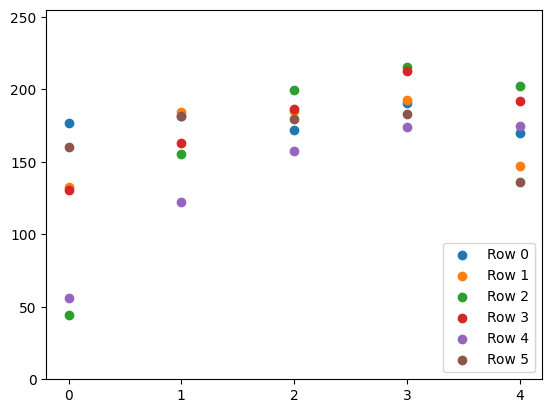

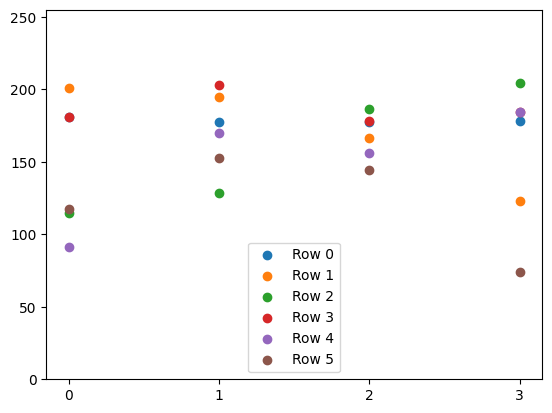

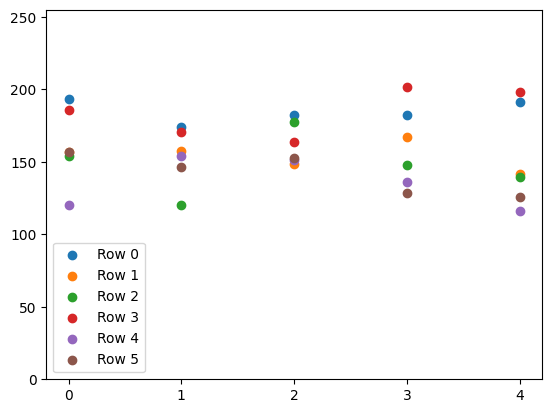

In [127]:
for df_ in [df_o,df_b,df_v]:
  x_values = range(len(df_.columns))
  for i, (_, row) in enumerate(df_.iterrows()):
      plt.scatter(x_values, row, label=f'Row {i}')
  # Set x-axis ticks and labels
  plt.xticks(x_values, df_.columns)
  # Set y-axis limits
  plt.ylim(0, 255)
  # Add legend
  plt.legend()
  # Show plot
  plt.show()

In [193]:
listas_histograms = list(procesar_new_img("/content/Jubilado_1.jpg"))

histograms_names = ["Vertical", "Hist_ojos","Hist_boca"]
tiks_1 = []
tiks_false_1 = []

for df_,list_nuew_img in zip([df_v,df_o,df_b],listas_histograms):
  tiks = []
  tiks_false = []
  n = 0
  f = 0
  for i,col in zip(list_nuew_img,list(df_.columns)):
    if df_[col].min() <= i <= df_[col].max():
      n = n+1
      tiks.append(n)
    else:
      f = f+1
      tiks_false.append(f)
  tiks_1.append(tiks)
  tiks_false_1.append(tiks_false)

poisibilidades = []
for list_nuew_img,i,z in zip(listas_histograms,range(len(tiks_1)),histograms_names):
  posibilidad = len(tiks_1[i])/len(list_nuew_img)
  poisibilidades.append(posibilidad)
  print(posibilidad*100,"% ","según: ",z)


Vertical, Hist_ojos, Hist_boca
100.0 %  según:  Vertical
100.0 %  según:  Hist_ojos
100.0 %  según:  Hist_boca


In [203]:
listas_histograms = list(procesar_new_img("/content/Jubilado_1.jpg"))

histograms_names = ["Vertical", "Hist_ojos","Hist_boca"]
tiks_1 = []
tiks_false_1 = []

for df_,list_nuew_img in zip([df_v,df_o,df_b],listas_histograms):
  tiks = []
  tiks_false = []
  n = 0
  f = 0
  for i,col in zip(list_nuew_img,list(df_.columns)):
    average = df_[col].mean()
    diff_max_min = (df_[col].max() - df_[col].min())/2
    average_top = average + diff_max_min
    average_bottom = average - diff_max_min
    if average_bottom <= i <= average_top:
      n = n+1
      tiks.append(n)
    else:
      f = f+1
      tiks_false.append(f)
  tiks_1.append(tiks)
  tiks_false_1.append(tiks_false)

poisibilidades = []
for list_nuew_img,i,z in zip(listas_histograms,range(len(tiks_1)),histograms_names):
  posibilidad = len(tiks_1[i])/len(list_nuew_img)
  poisibilidades.append(posibilidad)
  print(posibilidad*100,"% ","según: ",z)

print(sum(poisibilidades)/len(poisibilidades)*100, "% de probabilidades que sea una cara humana")

Vertical, Hist_ojos, Hist_boca
100.0 %  según:  Vertical
80.0 %  según:  Hist_ojos
50.0 %  según:  Hist_boca
76.66666666666666 % de probabilidades que sea una cara humana


In [182]:
def procesar_new_img(image_path):
  image_path = image_path
  for file_name in image_files:
      # Check if the file is an image file (optional)
      if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.JPG'):
        image_path = os.path.join(folder_path, file_name)
        img = Image.open(image_path)
        img = img.resize((70,95), Image.LANCZOS)
        img = img.convert('L')
        ## los horizontales:
        image = cv2.imread(image_path)
        resized_img = cv2.resize(image, (70,95), interpolation= cv2.INTER_AREA)

      # define el tamaño de cada región a 8 filas
      width, height = img.size[0], img.size[1] // 8

      # Descomponemos la imagen
      bins = []

      for i in range(8):
        img_part = img.crop((0, i*height, width, (i+1)*height))
        imagen_mat = np.array(list(img_part.getdata(band=0)), int)
        bins.append(imagen_mat)

      x_bins = []
      for bin in bins[2:-1]:
        x_bin = sum(bin)/len(bin)
        x_bins.append(x_bin)
      #print(x_bins)
      #print(file_name)

      # Dividimos en "placas" definir las rows y cols para ello.
      num_rows = 5
      num_cols = 7

      # Dividimos en placas
      tiles = divide_into_tiles(resized_img, num_rows, num_cols)

      # Convertimos a un numpy array
      tiles_as_matrices = [np.array(tile) for tile in tiles]

      # Podemos observar la cantidad de placas y su forma
      # for i, tile_matrix in enumerate(tiles_as_matrices):
      #     print(f'Tile {i} shape:', tile_matrix.shape)

      ojos_tiles_medias_top = []
      ojos_tiles_medias_bottom = []
      for i, z in zip(range(7,12), range(14,19)):
        flattenMatrix = tiles_as_matrices[i].flatten()
        flattenMatrix_2 = tiles_as_matrices[z].flatten()
        flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
        flattenMatrix_2 = sum(flattenMatrix_2) / len(flattenMatrix_2)
        ojos_tiles_medias_top.append(flattenMatrix)
        ojos_tiles_medias_bottom.append(flattenMatrix_2)

      ojos_sum_media_list = []
      for i,z in zip(ojos_tiles_medias_top,ojos_tiles_medias_bottom):
        tile_sum_media = (i + z) /2
        ojos_sum_media_list.append(tile_sum_media)

      boca_tiles_medias = []
      for i in range(22,26):
        flattenMatrix = tiles_as_matrices[i].flatten()
        flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
        boca_tiles_medias.append(flattenMatrix)
  print("Vertical, Hist_ojos, Hist_boca"),
  return x_bins, ojos_sum_media_list, boca_tiles_medias

In [184]:
vertical_hist, ojos_hist, boca_hist=procesar_new_img("/content/Jubilado_1.jpg")

Vertical, Hist_ojos, Hist_boca


In [ ]:

## Imagen con grids
plt.figure(figsize=(6,3.2))
plt.subplots_adjust(top=0.9, bottom=0.1)

plt.imshow(resized_img,'gray',vmin=-1,vmax=1)

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(19))
plt.grid(which="both", linewidth=0.72,color="k")
plt.tick_params(which="minor", length=0)

plt.show()

### Graficamos las integrales proyectivas
# metemos a un dict para faciltiar la creacion de imagen
my_dict = {f'row_{i}': value for i, value in enumerate(x_bins)}

# dibujamos el plot-line
plt.plot(list(my_dict.keys()), list(my_dict.values()), marker='o')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Line Plot of Values')
plt.ylim(0, 255)
plt.show()

# metemos a un dict para faciltiar la creacion de imagen
my_dict = {f'row_{i}': value for i, value in enumerate(ojos_sum_media_list)}

# dibujamos el plot-line
plt.plot(list(my_dict.keys()), list(my_dict.values()), marker='o')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Line Plot of Values')
plt.ylim(0, 255)
plt.show()

# metemos a un dict para faciltiar la creacion de imagen
my_dict = {f'row_{i}': value for i, value in enumerate(boca_tiles_medias)}

# dibujamos el plot-line
plt.plot(list(my_dict.keys()), list(my_dict.values()), marker='o')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Line Plot of Values')
plt.ylim(0, 255)
plt.show()